# Tarea 9: Algoritmos de Monte-Carlo

Esta tarea consiste de sólo 4 problemas que son una modificación no tan grande de lo que se vio en los videos. Son todos relativamente fáciles, pero requieren un tiempo no tan pequeño para hacerlos puesto que correr los programas ya no es cuestión de segundos, sino de minitos y cada prueba que se hace lleva entonces minutos, lo que típicamente implica horas de espera entre todas las pruebas. 

1. Haz una función que calcule el volumen de una hiper-esfera de dimensión $N$ y radio $r$ usando integrales de Monte-Carlo. Para hacer esto usa ambos métodos: 
    (i) El método de los disparos.
    (ii) Usando la integral de la distribución de probabilidad de una variable aleatoria. 
    (iii) Finalmente compara tu resultado con el área que debería tener como función del número de puntos de Monte-Carlo.

**Solución**

**(i)**

Primero el método de disparos. 

In [13]:
#nos fijaremos en la mitad superior.
#la función de la esfera:
function f(x,r)
        if (r^2-sum(x.^2))>0
            return sqrt((r^2-sum(x.^2)))
        else
            return 0
        end
    end
    

#Ahora los disparos:
function VolNSph_disparos(n,r,M=100000)
    count = 0
    
    for i in 1:M 
        
        #@show 
        x = (2*r).*rand(n).-r 
        #@show sum(x.^2)
        #@show r^2 - sum(x.^2)
        if -f(x[1:n-1],r)<=x[n] && x[n]<=f(x[1:n-1],r)
            count += 1 
        end
    end 
    
    return (2*r)^n*(count/M)
end

VolNSph_disparos (generic function with 2 methods)

In [14]:
#Probamos
n = 3
r = 5
@show VolReal=4/3*π*r^3
@show VolNSph_disparos(n,r)

VolReal = (4 / 3) * π * r ^ 3 = 523.5987755982989
VolNSph_disparos(n, r) = 522.25


522.25

Funciona muy bien.

**(ii)**

Ahora vamos a generalizar a varias dimensiones el método de la variable aleatoria. Esta vez, tenemos una variable aleatoria $X$ y una densidad $\rho_X:\mathbb{R}^n \longrightarrow [0,1]$. La densidad sigue siendo uniforme en $[0,1]^m$, de modo que $\rho_X(x) = 1$ si $x \in [0,1]^m$ y $0$ en cualquier otro caso. 

Si pensamos en que aplicamos la función $f$ de antes a la variable aleatoria $X$, y calculamos el promedio, tendremos que 

$$\langle f(X) \rangle = \int_{\mathbb{R}^m} f(x)\rho_X(x)dx =\int_{[0,1]^m} f(x)dx$$

Con esto podríamos integrar en el rectángulo $[-r,r]^m$ haciendo un cambio de variable.

Aplicar el método a la función $f$ nos daría sólo la semiesfera superior, por lo que el resultado hay que multiplicarlo por 2.

In [15]:
#Método de variable aleatoria:
VolNSph_va(n,r,m=10000) = 2*(2*r)^(n-1)*sum([f(rand(n-1).*(2*r).-r,r) for i in 1:m])/(m)

VolNSph_va (generic function with 3 methods)

In [16]:
#Probamos:
@show VolReal
@show VolNSph_va(f,r,n,100000)

VolReal = 523.5987755982989
VolNSph_va(f, r, n, 100000) = 524.4113399146688


524.4113399146688

Funciona bien también

**(iii)**


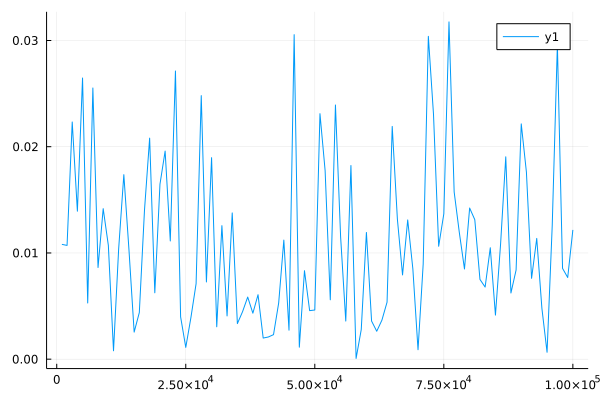

In [17]:
#Primero haremos una función que nos dé el valor real del volumen de la hiperesfera
function VolNSph(n,r)
    if mod(n,2)==0
        k=floor(Int,n/2)
        return π^k/factorial(k)*r^n
    else
        k =floor(Int,(n-1)/2)
        return 2*factorial(k)*(4*π)^k/factorial(n)*r^n
    end    
end
    
ComparaDisp(puntos,n,r) = abs(VolNSph(n,r)-VolNSph_disparos(n,r))   

ComparaVA(puntos,n,r) = abs(VolNSph(n,r)-VolNSph_va(n,r))

using Plots

puntos = 1000:1000:100000
plot(puntos,ComparaDisp.(puntos,3,1))

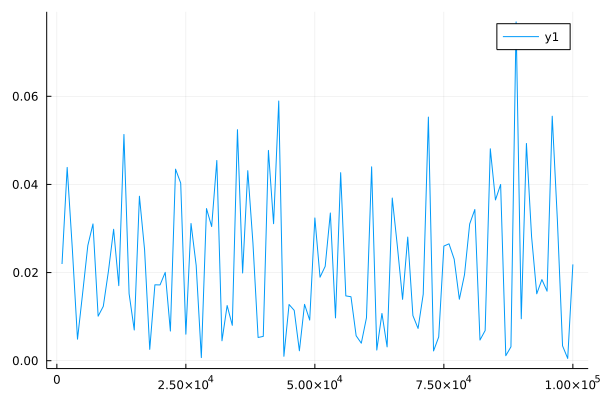

In [18]:
plot(puntos,ComparaVA.(puntos,3,1))

2. Da una interpreatación de caminantes aleatorios a la siguiente ecuación diferencial parcial y resuelvela (para alguna condición a la frontera que dibujes y una función $f(x,y)$ que tú desidas) usando caminantes aleatorios: 

    $$\nabla^2 u = c$$ con $c$ una constante y $\nabla^2$ el laplaciano. 

**Solución**

Análogo a lo que se hizo en los videos, para dar una interpretación primero expresamos como ecuación en diferecias

$$ \frac{u(x+\Delta, y) + u(x-\Delta, y) +u(x, y+\Delta) + u(x, y-\Delta) - 4 u(x,y)}{\Delta} = c$$

Que resulta en

$$u(x,y) = - \frac{c}{4}\Delta  + \frac{u(x+\Delta, y) + u(x-\Delta, y) +u(x, y+\Delta) + u(x, y-\Delta) }{4} = \frac{[u(x+\Delta, y)-c\Delta] + [u(x-\Delta, y)-c\Delta] +[u(x, y+\Delta)-c\Delta] + [u(x, y-\Delta) -c\Delta]}{4}$$

Es un probedio de las contrubuciones delos alrededores rebajadas con un término proporcional al tamaño de paso al cuadrado. Podemos hacer un análisis parecido al de los videos, considerando una retícula con tamaño de pasoigual a $\Delta$, El valor de la u(x,y) sería igual a un promedio de los valores en la frontera de los caminantes aleatorios menos un factor de $Nc\Delta$ donde $N$ es el número de pasos que da el caminante desde x,y hasta la frontera

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


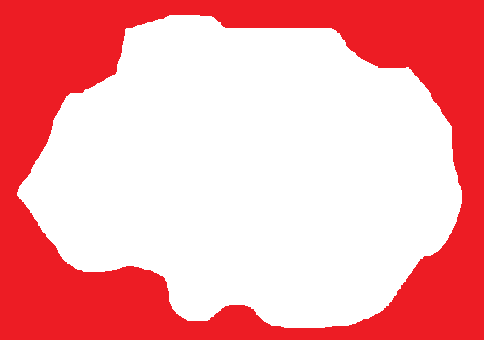

In [40]:
using Plots, Images
placa = load("placa.png")

n * m = 164560


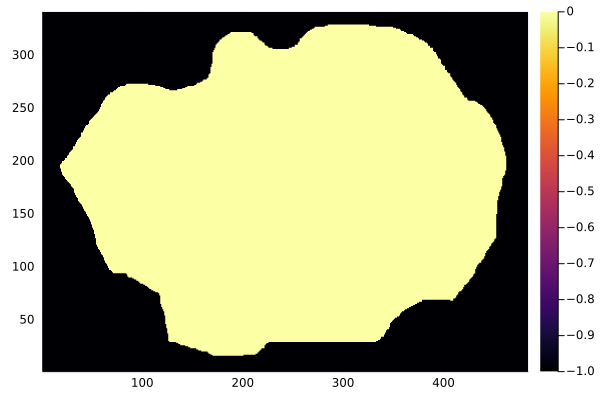

In [45]:
n,m = size(placa)
@show n*m
retic = [placa[i,j] == placa[1,1] ? -1 : 0 for i in 1:n, j in 1:m]; 
heatmap(retic)

In [46]:
function posicion_permitida(i,j, retícula)
    if retícula[i,j] == -1 
        return false
    else
        return true
    end
end

posicion_permitida (generic function with 1 method)

In [47]:
function evoluciona_caminante(i,j, retícula)
    n = rand([1,2,3,4])
    if n == 1 
        return i + 1, j
    elseif n == 2
        return i - 1, j
    elseif n == 3
        return i, j + 1
    elseif n == 4
        return i, j - 1
    end
end 

function trayectoria_hasta_salir!(i,j, retícula)
    test = true
    I = [i]
    J = [j]
    while test
        i,j = evoluciona_caminante(i,j, retícula)
        push!(I, i)
        push!(J, j)
        test = posicion_permitida(i,j, retícula)
    end
    return I, J
end 

trayectoria_hasta_salir! (generic function with 1 method)

In [48]:
function minimum_positivo(matriz)
    n,m = size(matriz)
    x = Inf
    for i in 1:n, j in 1:m
        if matriz[i,j]<x && matriz[i,j] >= 0
            x = matriz[i,j]
        end
    end
    if x ≠ Inf
        return x
    else
        return 0
    end 
end

minimum_positivo (generic function with 1 method)

De aquí, la solución sólo difiere un poco a lo visto en el video

In [61]:
function resuelve_Poisson(retícula, f, n,c,Δ)    
    contador = 0
    n1, n2 = size(retícula)
    solución = zeros(n1,n2)
    numero_de_caminantes = [retícula[i,j]<0 ? -1 : 0 for i in 1:n1, j in 1:n2]
    while minimum_positivo(numero_de_caminantes)<n
        for i in 1:n1, j in 1:n2
            contador += 1
            if mod(contador, 1500) == 0
                println("revisando vertice ($i ,$j)")
                println("numero maximo de caminantes = $(maximum(numero_de_caminantes))")
                println("numero mínimo de caminantes = $(minimum_positivo(numero_de_caminantes))")
                println(" ")
            end
            test = posicion_permitida(i,j, retícula)
            if test
                x,y = trayectoria_hasta_salir!(i,j,retícula)
                s = f(x[end], y[end])
                for k in 1:length(x)-1
                    solución[x[k],y[k]] += s
                    numero_de_caminantes[x[k],y[k]] += 1
                    solución[x[k],y[k]] -= (x[k]+y[k])*c*Δ #Este es el cambio
                end
            end
        end
    end
    return solución, numero_de_caminantes
end

resuelve_Poisson (generic function with 1 method)

In [62]:
function mezcla_solucion_n(s, nc)  # Esta función simplemente sirve para hacer los promedios de la solución correctamente. 
    n,m = size(s)
    [nc[i,j] > 0 ? s[i,j]/nc[i,j] : NaN for i in 1:n, j in 1:m]
end

mezcla_solucion_n (generic function with 1 method)

In [63]:
f(y,x) = 1/(y+1)
c=1
Δ=1
@time solución, numero_de_caminantes = resuelve_Poisson(retic, f, 10,c,Δ)

revisando vertice (4 ,48)
numero maximo de caminantes = 0
numero mínimo de caminantes = 0
 
revisando vertice (7 ,96)
numero maximo de caminantes = 0
numero mínimo de caminantes = 0
 
revisando vertice (10 ,144)
numero maximo de caminantes = 0
numero mínimo de caminantes = 0
 
revisando vertice (13 ,192)
numero maximo de caminantes = 0
numero mínimo de caminantes = 0
 
revisando vertice (16 ,240)
numero maximo de caminantes = 17
numero mínimo de caminantes = 0
 
revisando vertice (19 ,288)
numero maximo de caminantes = 54
numero mínimo de caminantes = 0
 
revisando vertice (22 ,336)
numero maximo de caminantes = 127
numero mínimo de caminantes = 0
 
revisando vertice (25 ,384)
numero maximo de caminantes = 217
numero mínimo de caminantes = 0
 
revisando vertice (28 ,432)
numero maximo de caminantes = 354
numero mínimo de caminantes = 0
 
revisando vertice (31 ,480)
numero maximo de caminantes = 453
numero mínimo de caminantes = 0
 
revisando vertice (35 ,44)
numero maximo de caminantes

revisando vertice (264 ,208)
numero maximo de caminantes = 28121
numero mínimo de caminantes = 30
 
revisando vertice (267 ,256)
numero maximo de caminantes = 28260
numero mínimo de caminantes = 30
 
revisando vertice (270 ,304)
numero maximo de caminantes = 28363
numero mínimo de caminantes = 30
 
revisando vertice (273 ,352)
numero maximo de caminantes = 28453
numero mínimo de caminantes = 30
 
revisando vertice (276 ,400)
numero maximo de caminantes = 28563
numero mínimo de caminantes = 31
 
revisando vertice (279 ,448)
numero maximo de caminantes = 28677
numero mínimo de caminantes = 33
 
revisando vertice (283 ,12)
numero maximo de caminantes = 28726
numero mínimo de caminantes = 34
 
revisando vertice (286 ,60)
numero maximo de caminantes = 28793
numero mínimo de caminantes = 35
 
revisando vertice (289 ,108)
numero maximo de caminantes = 28878
numero mínimo de caminantes = 36
 
revisando vertice (292 ,156)
numero maximo de caminantes = 28948
numero mínimo de caminantes = 36
 
re

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-1 -1 … -1 -1; -1 -1 … -1 -1; … ; -1 -1 … -1 -1; -1 -1 … -1 -1])

In [64]:
@show maximum(numero_de_caminantes), minimum_positivo(numero_de_caminantes)
ss = mezcla_solucion_n(solución, numero_de_caminantes);

(maximum(numero_de_caminantes), minimum_positivo(numero_de_caminantes)) = (29191, 36)


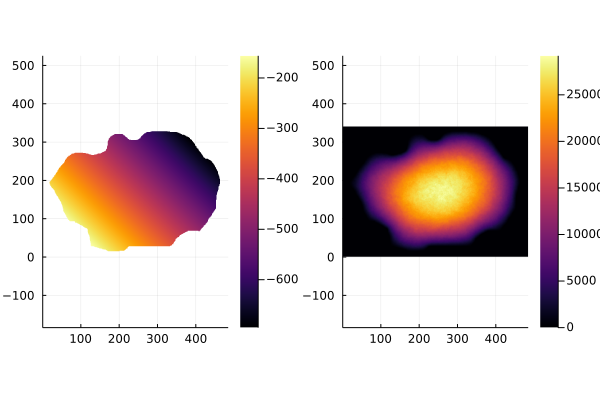

In [65]:
heatp = heatmap(numero_de_caminantes, aspect_ratio = :equal)
heatT = heatmap(ss, aspect_ratio = :equal)
plot(heatT, heatp)

3. Simula un sistema de 50 discos suaves en una caja (de lado $1$). Para esto considera un potencial de interacción $U(r_{i,j})$ que depende de $r_{i,j}$, la distancia entre el disco $i$ y el disco $j$ ($i \ne j$) igual al potencial de Lennard Jones  ($U(r_{i,j}) = \left(\frac{\sigma}{r_{i,j}}\right)^{12} - \left(\frac{\sigma}{r_{i,j}}\right)^6$, donde $\sigma$ es el diametro de los discos) si $r_{i,j} \le \sigma$ y $U(r_{i,j}) = 0$ cuando $r_{i,j} > \sigma$.

Tu simulación hazla similar a lo que se hizo en los videos. Comienza con discos de radio $0$ y crece el tamaño de esos discos hasta que se llegue a una fracción de empaquetamiento alta. Nota que esta vez la simulación sí depende de la temperatura (prueba con unas 3 o 4 temperaturas diferentes). 

Nota: La fracción de empaquetamiento es la suma del área de todos los discos dividido entre el área de la caja. 

In [8]:
#Importaremos la estructura de disco, su función de impresión y las funciones de traslape 
mutable struct Disco
    radio::Real
    posición::Vector
    velocidad::Vector
    color
end

using Colors, LinearAlgebra
import Plots.plot!
function plot!(disco::Disco)
    θ = 0:0.05:(2π+0.05)
    x = disco.radio*(cos.(θ)).+disco.posición[1]
    y = disco.radio*(sin.(θ)).+disco.posición[2]
    plot!(x,y, fill = true, color = disco.color)
end

function overlap(discos)
    n = length(discos)
    for i in 1:n-1
        for j in i+1:n
            if norm(discos[i].posición-discos[j].posición)<discos[i].radio+discos[j].radio
                return true
            end
        end
    end
    for i in 1:n
        if discos[i].posición[1]<discos[i].radio || discos[i].posición[1]> 15-discos[i].radio || discos[i].posición[2]<discos[i].radio || discos[i].posición[2]>15-discos[i].radio 
            return true
        end
    end
    return false
end

function overlap(discos, i)
    disco = discos[i]
    n = length(discos)
    if disco.posición[1]<disco.radio || disco.posición[1]> 15-disco.radio || disco.posición[2]<disco.radio || disco.posición[2]>15-disco.radio
        return true
    end
    for j in (1:(i-1))∪((i+1):length(discos))
        if norm(discos[j].posición-disco.posición)<discos[j].radio+disco.radio
            return true
        end
    end
    return false
end



overlap (generic function with 2 methods)

In [9]:
#Luego, debemos hacer una función que nos dé el siguiente paso de la simulación
#Para esto hay que resolver el sistema de ecuaciones dada la ineteracción

#La fuerza entre 2 partículas
ϵ = 1
σ = 1
F_LJ(x1,x2) = (4*ϵ*(12*σ^12/norm(x1-x2)^14-6*σ^6/norm(x1-x2)^8)).*(x1-x2)
#Considerando masa = 1

#Icluiremos aquí la función solucionador de RK4 a un solo paso
function RK4_1paso(f, x0,h = 0.01) # es de orden 4, así que en realidad el error en cada paso será 10^-8
    t0 = 0
    X = x0
    
    k1 = f(x0, t0)
    k2 = f(x0 .+ h*k1/2, t0 + h/2)
    k3 = f(x0 .+ h*k2/2, t0 + h/2)
    k4 = f(x0 .+ h*k3, t0 + h)
    X = X .+ (h/6) .* (k1 + 2k2 + 2k3 + k4) 
    t0 = t0+h
    return X
end 

RK4_1paso (generic function with 2 methods)

In [20]:
#Ahora, para la simulación modificaremos la función de simulación
using LinearAlgebra

function simulacion_MC_discos_suaves!(discos, pasos = length(discos)*100, h = 0.05)
    nd = length(discos)
    discos2 = deepcopy(discos)
    D = [discos2]
    
    for i in 1:pasos
        if mod(i, 5000) == 0
            println(i*100/pasos, " %")
        end
        
        discos2 = deepcopy(discos)
        test = rand([true, false, false, false])
    ##########################################################    
        if test
            for k in 1:nd
                discos2[k].radio += 0.01
            end
            
            if overlap(discos2)
        #        push!(D, deepcopy(discos))               #Esta parte la dejamos igual para
            else                                          # que el radio se incremente
                discos = deepcopy(discos2)
                push!(D, deepcopy(discos2))
            end
            continue
        end
     ############################################################   

        j = rand(1:nd) #una partícula se mueve
        
        #La función de la segunda derivada de la posición es
        function dv(j)
            if j==1 
                 return sum([F_LJ(discos2[j].posición,discos2[i].posición) for i in 2:nd])
            elseif j==nd
                 return sum([F_LJ(discos2[j].posición,discos2[i].posición) for i in 1:nd-1])       
            else
                 return sum([F_LJ(discos2[j].posición,discos2[i].posición) for i in ((1:(j-1))∪((j+1):nd))])       
            end
        end 
            
        f(x,t) = [x[3],x[4],dv(j)[1],dv(j)[2]]
           #Resolvemos con RungeKuta4 
           
        x0 = [discos2[j].posición[1],discos2[j].posición[2],discos2[j].velocidad[1],discos2[j].velocidad[2]]

        Xsol = RK4_1paso(f,x0,h)
        
        discos2[j].posición = [Xsol[1],Xsol[2]]
        discos2[j].velocidad = [Xsol[3],Xsol[4]]
            

     #############################################################   
        if overlap(discos2, j)
    #        push!(D, deepcopy(discos))
            continue                                    #Esta parte también la dejamos igual
        else                                            #como en el video
            discos[j] = deepcopy(discos2[j])
            push!(D, deepcopy(discos))
        end
      ##############################################################3   
    end    
    return D    
end
    

simulacion_MC_discos_suaves! (generic function with 3 methods)

In [21]:
#Arreglo de discos de radio 0
discos = []
for i in 1:50    #posición #velocidad
    d = Disco(0.0,rand(2)*15,rand(2), RGB(0.8,0.5,0.2))
    @show push!(discos, d)
end
@show length(discos)
@time D = simulacion_MC_discos_suaves!(discos, 2500000);
discos = deepcopy(D[end]);


push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2))]
push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2))]
push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2))]
push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727],

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

push!(discos, d) = Any[Disco(0.0, [8.164126020243927, 8.705522036092594], [0.5331133465284361, 0.25854541185658686], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [4.279516886947908, 12.431132202102727], [0.5038985517075563, 0.10103637508613739], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [1.3868639381993875, 3.7490291500309922], [0.8146260071281897, 0.5860263255701132], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [8.901668861248353, 9.731998682331902], [0.16584126194720628, 0.6001158140474787], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.834509036732705, 10.960723070774218], [0.22090814300845785, 0.5507246856164054], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [10.358832463520622, 6.600371530823466], [0.16533038785300813, 0.23483669846880306], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [6.189554615457404, 10.977630376222361], [0.3775128133023562, 0.12011156846133875], RGB{Float64}(0.8,0.5,0.2)), Disco(0.0, [3.562042223115578, 11.891908573489317], [0.5122500513344272, 0.9135328265880305], RGB{Float64}(0.8,0.5,0

length(discos) = 50
0.2 %
0.4 %
0.6 %
0.8 %
1.0 %
1.2 %
1.4 %
1.6 %
1.8 %
2.0 %
2.2 %
2.4 %
2.6 %
2.8 %
3.0 %
3.2 %
3.4 %
3.6 %
3.8 %
4.0 %
4.2 %
4.4 %
4.6 %
4.8 %
5.0 %
5.2 %
5.4 %
5.6 %
5.8 %
6.0 %
6.2 %
6.4 %
6.6 %
6.8 %
7.0 %
7.2 %
7.4 %
7.6 %
7.8 %
8.0 %
8.2 %
8.4 %
8.6 %
8.8 %
9.0 %
9.2 %
9.4 %
9.6 %
9.8 %
10.0 %
10.2 %
10.4 %
10.6 %
10.8 %
11.0 %
11.2 %
11.4 %
11.6 %
11.8 %
12.0 %
12.2 %
12.4 %
12.6 %
12.8 %
13.0 %
13.2 %
13.4 %
13.6 %
13.8 %
14.0 %
14.2 %
14.4 %
14.6 %
14.8 %
15.0 %
15.2 %
15.4 %
15.6 %
15.8 %
16.0 %
16.2 %
16.4 %
16.6 %
16.8 %
17.0 %
17.2 %
17.4 %
17.6 %
17.8 %
18.0 %
18.2 %
18.4 %
18.6 %
18.8 %
19.0 %
19.2 %
19.4 %
19.6 %
19.8 %
20.0 %
20.2 %
20.4 %
20.6 %
20.8 %
21.0 %
21.2 %
21.4 %
21.6 %
21.8 %
22.0 %
22.2 %
22.4 %
22.6 %
22.8 %
23.0 %
23.2 %
23.4 %
23.6 %
23.8 %
24.0 %
24.2 %
24.4 %
24.6 %
24.8 %
25.0 %
25.2 %
25.4 %
25.6 %
25.8 %
26.0 %
26.2 %
26.4 %
26.6 %
26.8 %
27.0 %
27.2 %
27.4 %
27.6 %
27.8 %
28.0 %
28.2 %
28.4 %
28.6 %
28.8 %
29.0 %
29.2 %
29.4 %


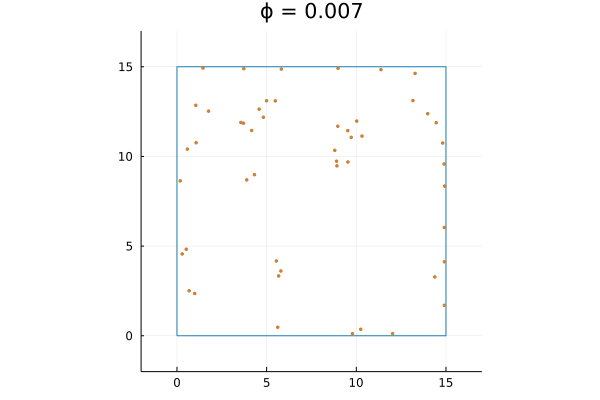

┌ Info: Saved animation to 
│   fn = /home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif
└ @ Plots /home/jigalindo0104/.julia/packages/Plots/Awg62/src/animation.jl:104


Plots.AnimatedGif("/home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif")
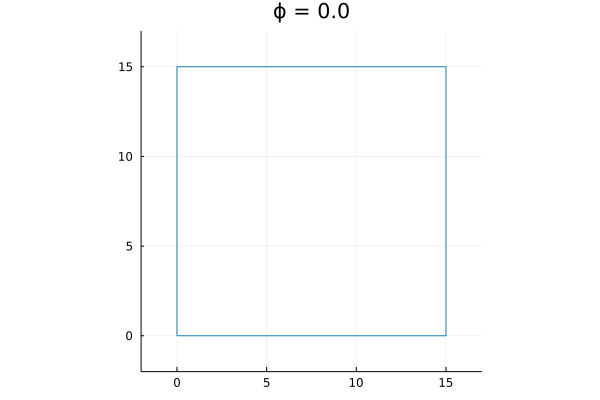

In [23]:
using Plots
gr()
@gif for i in 1:25:length(D)
    plot(aspect_ratio = :equal, key = false, xlim = (-2,17), ylim = (-2,17))
    plot!([0,15,15,0,0], [0,0,15,15,0], color = RGB(0.1,0.5,0.7))
    for j in 1:length(D[1])
        plot!(D[i][j])
    end
    plot!(show = :ijulia, title = "ϕ = $(round(100*π*D[i][1].radio^2/15^2, digits = 3))")
end

4. Simula el modelo de Ising para una red hexagonal, es decir, cada vértice tiene 3 vecinos (y si dibujas la red, verás hexágonos). Para esto necesitas hacer 2 cambios importantes a lo visto en los videos: 
    
    (i) Modificar la función que produce los vecinos. 
    (ii) Modificar la función que grafica para que cada nodo lo ponga como un hexágono de un color si el espín apunta hacia arriba y de otro si apunta hacia abajo. 
    
    Revisa en particular los caso $J = -1/2$ y $J = 1/2$ y de este último obtén (haciendo un promedio de 5 casos nada más) la magnetización como función de la temperatura. 

**Solución**

Vamos a definir un sistema de coordenadas para la red hexagonal. Supongamos que la red es de hexágonos de longitud $h$, suponiendo que los hexágonos tienen un par de lados paralelos al eje x del plano, entonces, la base que definimos son los vectores que en coordenadas polares se escriben como 

$$u_1 = (r_1,\theta_1) = (a,0)$$

$$u_2 = (r_2,\theta_2) = (a,\frac{2}{3}\pi)$$

$$u_3 = (r_3,\theta_3) = (a,\frac{5}{3}\pi)$$

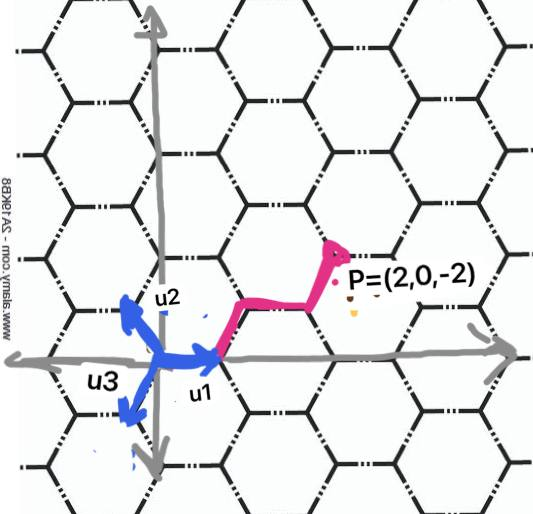

Notamos que de un nodo con coordenadas $P = (a,b,c)$ tal que $mod(a+b+c,2)=0$  solo se puede dar paso en dirección $+u_1$, $+u_2$ o $+u_3$, mientras que si $mod(a+b+c,2) = 1$ sólo se puede dar paso en las direcciones  $-u_1$, $-u_2$ o $-u_3$. En los términos que nos conciernen, esos significa que 

a) para los nodos del primer tipo, los vecinos son 

$$P_1=(a+1,b,c)\;,\;\;P_2 = (a,b+1,c)\;y\;\;P_3 = (a,b,c+1)$$

b) Para los del segundo tipo, sus vecinos son 

$$P_1=(a-1,b,c)\;,\;\;P_2 = (a,b-1,c)\;y\;\;P_3 = (a,b,c-1)$$


Ahora, primero vamos a construir una reticula plana, formando un arbol partiendo del centro hacia afuera. Llamaremos "orden" de la retícula a la cantidad de pasos que se hacen del centro a cualquier punto de la orilla (construimos la retícula de tal forma que este número de pasos en constante para todos los puntos en la orilla). Por ejemplo,la retícula de orden 1 tiene 4 nodos: 
$$O = (0,0,0)\;,\;\;N_1=(1,0,0)\;,\;\;N_2 = (0,1,0)\;y\;\;N_3 = (0,0,1)$$

In [33]:
#construmos entonces una función para los vecinos de un nodo N=(a,b,c)
function vecinos_N_abc(N)  
        if mod(sum(N),2)==0
             [N.+[1.0,0.,0.],N.+[0.,1.,0.],N.+[0.,0.,1.]]
        elseif mod(sum(N),2)==1    
             [N.-[1.,0.,0.],N.-[0.,1.,0.],N.-[0.,0.,1.]]   
        end
end    
#para construir la retícula necesitaremos de una función Paso
#toma como argumento una posición y un entero (1,2 o 3) que determina la dirección de avance que esté permitida
function Paso(P::Array{Float64,1},paso::Int64)
    if mod(sum(P),2)==0
        if paso ==1
            return P.+[1.,0.,0.]
        elseif paso ==2
            return P.+[0.,1.,0.]
        elseif paso ==3
            return P.+[0.,0.,1.]
        end        
    elseif mod(sum(P),2)==1
        if paso ==1
            return P.+[-1.,0.,0.]
        elseif paso ==2
            return P.+[0.,-1.,0.]
        elseif paso ==3
            return P.+[0.,0.,-1.]
        end
    end
end    
    
    
#la función que guarda las coordenadas de todos los nodos en un arreglo 

function retícula(g)
    Nodos = [[0.0,0.0,0.0]]
    for i in 1:g
        Nuevos = [Paso(Nodos[i],j) for i in 1:length(Nodos) for j in 1:3 ]
        Nodos = Nodos ∪ unique!(Nuevos)
    end
    return Nodos
end
    
function vecinos(retícula)
    Vecinos = []
    vec_index = []
    for i in 1:length(retícula)
        vec = vecinos_N_abc(retícula[i])
        push!(Vecinos,vec)
        a,b,c = -1,-1,-1 
        for k in 1:length(retícula)
            #@show retícula[k]
            #@show vec[1]
            #@show vec[1]==retícula[k]
            count=0
            if vec[1]==retícula[k]
                a = k
                count+=1
            elseif vec[2]==retícula[k]
                b = k
                count+=1
            elseif vec[3]==retícula[k]
                c = k
                count+=1
            end
            if count==3
                break
            end
        end 
        push!(vec_index,[a,b,c])
        
    end 

    return Vecinos, vec_index
end   
    

vecinos (generic function with 1 method)

In [34]:
!(1 ∈ [1,2,3])

false

In [35]:

function suma(σ, vec_index, ret,g)
    s = 0
    for i in 1:length(σ)
        if  sum(abs.(ret[i]))==g
            for l in 1:3
                if vec_index[i][l]!=-1 
                    s+=σ[vec_index[i][l]]*σ[i]
                else
                    s+=(1)*σ[i] #Los vecinos imaginarios de los nododos de la frontera tienen σ=+1
                end
            end    
        elseif sum(abs.(ret[i]))<g        
        s += sum([σ[k] for k in vec_index[i]])*σ[i]
        end    
    end
    return s
end
H(σ, ret , g; h = 0, J = 1/2) = -h*sum(σ) - J*suma(σ,vec_index, ret , g) 

H (generic function with 1 method)

In [36]:
function ΔH(σ, i, vec_index,ret,g; h = 0, J = -1)
    s = 2h*σ[i] 
    if  sum(abs.(ret[i]))==g
            for l in 1:3
                if vec_index[i][l]!=-1  
                    s+=4J*σ[i]*σ[vec_index[i][l]]
                else
                    s+=4J*σ[i]*(1) #Los vecinos imaginarios de los nododos de la frontera tienen σ=+1
                end
            end    
    elseif sum(abs.(ret[i]))<g        
        s += 4J*σ[i]*sum([σ[k] for k in vec_index[i]])
    end
    
    return s
end

ΔH (generic function with 1 method)

In [37]:
function Boltzmann(Δ𝐻, 𝑘𝑇) 
    if Δ𝐻 == 0
        return 1
    else
        return min(1,exp(-Δ𝐻/𝑘𝑇))
    end
end
function Metropolis_ising!(σ, vec_index,ret, g, H1; n_pasos = 1, kT = 1, kargs...)
    l = length(σ)
    centro_material = 1:length(σ)
    mag = 0
    for i in 1:n_pasos
        j = rand(centro_material)
        ΔH1 = ΔH(σ, j,vec_index,ret,g ; kargs...)
        p = Boltzmann(ΔH1, kT)
        x = rand()
        if x<p
            σ[j] *= -1
        end
        if i > n_pasos-1000
            mag += sum(σ)/l
        end
        H1 += ΔH1
    end
    return σ, H1, mag/1000
end

Metropolis_ising! (generic function with 1 method)

Ya tenemos todo listo, ahora hay que plotear. Para esto, representaaremos cada cada nodo con un triángulo equilátero. Hay sólo 2 orientaciones de triángulos, uno con la punta hacia la derecha y otro con la punta hacia la izquierda. queremos que los triángulos compartan lados, de modo que el nodo central es un triángulo que apunta hacia la izquierda. Notamos que los nodos de primer tipo tienen orientación hacia la izquierda, mientras que los de segundo tipo tienen orientación derecha.

In [38]:
#Hacemos una función que grafica un triángulo dado su centro,
#la longitud de su apotema,su orientación y su color.
using Plots
function dibuja_triángulo!(x::Array{Float64,1},ap,or=:izquierda,color=RGB(1.,0.,0.))
        if or == :izquierda
            vx = [x[1]+ap,x[1]-2*ap,x[1]+ap] 
            vy = [x[2]+sqrt(3)*ap,x[2],x[2]-sqrt(3)*ap]
        elseif or == :derecha
            vx = [x[1]-ap,x[1]+2*ap,x[1]-ap] 
            vy = [x[2]+sqrt(3)*ap,x[2],x[2]-sqrt(3)*ap] 
        end    
        plot!(vx,vy,fill=true,color=color,key=false)
end

#ahora una función que pase de las coordenadas que establecimos a coordenadas cartesianas
function cartesianas(P::Array{Float64,1},a)
    u1 = [a,0]
    u2 = [-a/2,a*sqrt(3)/2]
    u3 = [-a/2,-a*sqrt(3)/2]
    x = P[1].*u1.+P[2].*u2.+P[3].*u3
    return x
end
    
#Ahora vamos plotear 4 triángulos para ver que funcione

function Dibuja_retícula!(σ1,retícula,g;a = 1.0,color1 = RGB(1,0,0),color2 = RGB(0,0,0.7))
    for i in 1:length(σ1)
        nodo=retícula[i]
        if mod(sum(nodo),2)==0
            or = :izquierda
        elseif mod(sum(nodo),2)==1
            or = :derecha
        end
        
        x = cartesianas(nodo,a)
        if σ1[i]==1
            dibuja_triángulo!(x,a/2,or,color1)
        elseif σ1[i]==-1
            dibuja_triángulo!(x,a/2,or,color2)
        end    
    end
    return 0
end    

Dibuja_retícula! (generic function with 1 method)

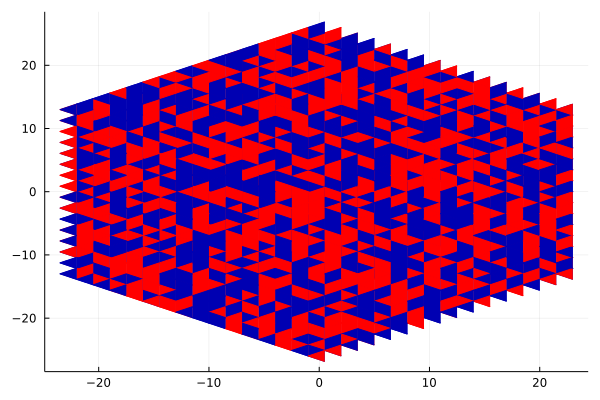

In [25]:
g1 = 30
ret1 = retícula(g1)
#Vec1,vec_index1 = vecinos(ret1)
σ11 = rand([-1,1],length(ret1))
Dibuja_retícula!(σ11,ret1,g1)
plot!()

┌ Info: Saved animation to 
│   fn = /home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif
└ @ Plots /home/jigalindo0104/.julia/packages/Plots/Awg62/src/animation.jl:104


Plots.AnimatedGif("/home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif")
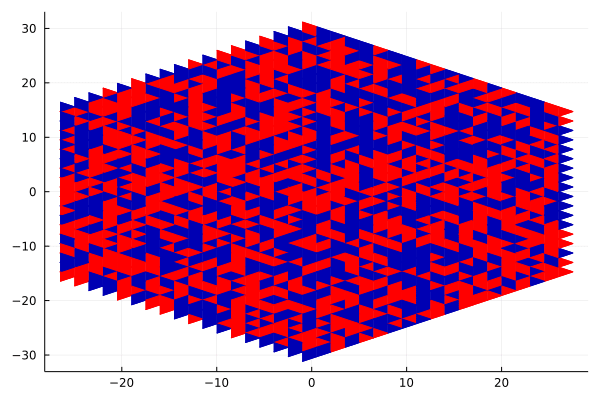

In [70]:
#ahora sí, la animación
g = 35
J = 1/2
ret = retícula(g)
Vec,vec_index = vecinos(ret)

σ1 = rand([-1,1],length(ret))

H1 = H(σ1, ret , g; h = 0.0, J = J)
plot()
Dibuja_retícula!(σ1,ret,g)
plot!()

kT = 5

t=20
@gif for i in 1:t   
        σ2 = deepcopy(σ1)
        H2 = deepcopy(H1)
        σ2, H2, mag = Metropolis_ising!(σ2, vec_index,ret, g,H2, n_pasos = 10*(g^3), kT = kT, h = 0.0, J = J)
        
        Dibuja_retícula!(σ1,ret,g)
    end
